# Practical Task - Random Forest

## Create a decision tree, bagged tree, boosted tree and random forest that can predict the survival of passengers on the Titanic.

### Importing Modules

In [1]:
# Import all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

#Splitting data into training and testing set
from sklearn.model_selection import train_test_split

# Import metrics libraries 
from sklearn.metrics import accuracy_score


### Load the dataset

In [2]:
# Read the CSV file and create a dataframe
titanic_df = pd.read_csv("titanic.csv")

# Display few observations
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Look at the dataset column details
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Check for null values in the dataset
titanic_df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

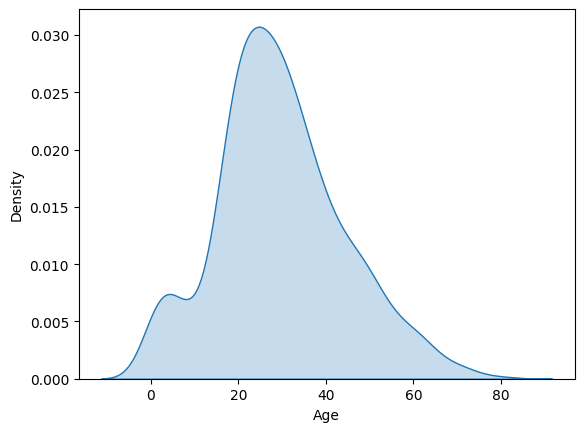

In [5]:
# Create a kdeplot for age to see the distribution of observations of Age feature 
sns.kdeplot(titanic_df["Age"], fill = True)

From the above graphs, we can see observations for Age column is a skewed distribution. As this feature  is important for target variable, we can  replace the missing values with median value of the age column.

In [6]:
# Replace null values in Age column with median value of all passenger's age 
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].median())

Now let's look at Embarked column which denotes the port of embarkation. As this is a nominal categorical value and only very few observations are missing, we will replace with the most frequent value instead of deleting the rows of the missing value. Let's do a histplot to see the frequent value.

<Axes: xlabel='Embarked', ylabel='Count'>

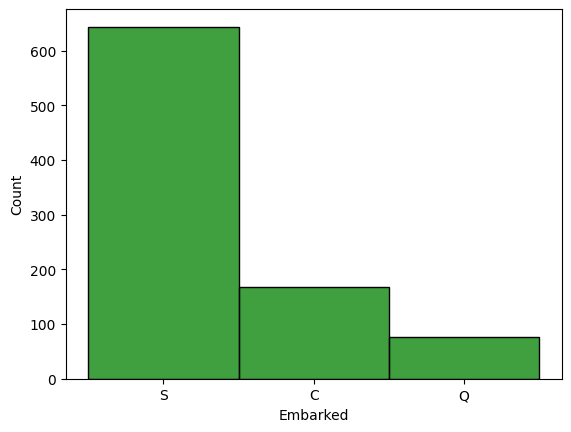

In [7]:
sns.histplot(titanic_df['Embarked'], color = 'g')

In [8]:
# Replace missing values in Embarked column with mode
titanic_df["Embarked"] = titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0])

Now, let's look into the target variable.

Here our target variable is 'Survived' as per the given requirement.

Now, drop the columns such as Name, Ticket, Fare & Cabin that doesnt have have any impact on the target variable

In [9]:
# Drop the columns you'd like here
titanic_df.drop(columns=["Name", "Ticket", "Fare", "Cabin"], axis=1, inplace=True)

In [10]:
# Check if all NANs have been replaced
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [11]:
# Check for data types
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [12]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [13]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"], dtype = int)
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex_female,Sex_male
0,1,0,3,22.0,1,0,S,0,1
1,2,1,1,38.0,1,0,C,1,0
2,3,1,3,26.0,0,0,S,1,0
3,4,1,1,35.0,1,0,S,1,0
4,5,0,3,35.0,0,0,S,0,1


Now, we do the same to the "Embarked" column.

In [14]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"], dtype = int)
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,0,1,0,0,1
1,2,1,1,38.0,1,0,1,0,1,0,0
2,3,1,3,26.0,0,0,1,0,0,0,1
3,4,1,1,35.0,1,0,1,0,0,0,1
4,5,0,3,35.0,0,0,0,1,0,0,1


<Axes: >

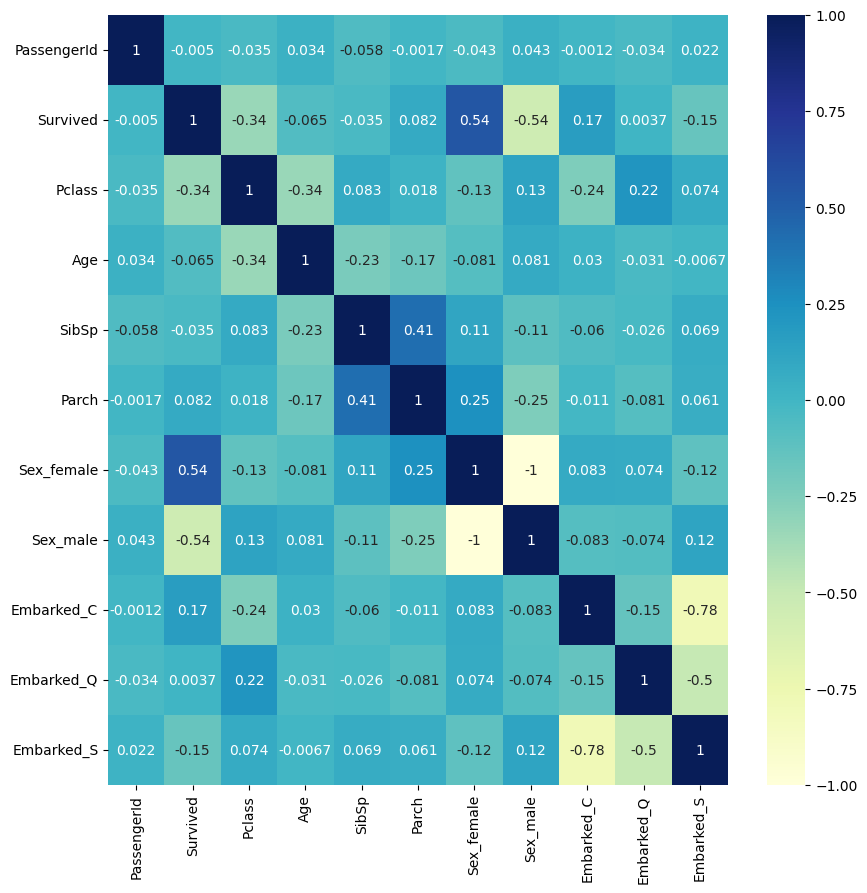

In [15]:
# Now let do a heatmap to understand the correlations
plt.figure(figsize=(10,10))
sns.heatmap(titanic_df.corr(), annot = True, cmap = 'YlGnBu')

### Set the Features and Targets

In [16]:
# Set the X & y columns for the model
X = titanic_df.drop('Survived', axis=1).values
y = titanic_df['Survived'].values

### Train and Test set split

In [17]:
# Split the original dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Import Decision Tree Model

In [18]:
# Create a classifier 
unpruned = DecisionTreeClassifier(max_depth=None, random_state=42)

# Training a model without pruning
unpruned.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Tree Plot

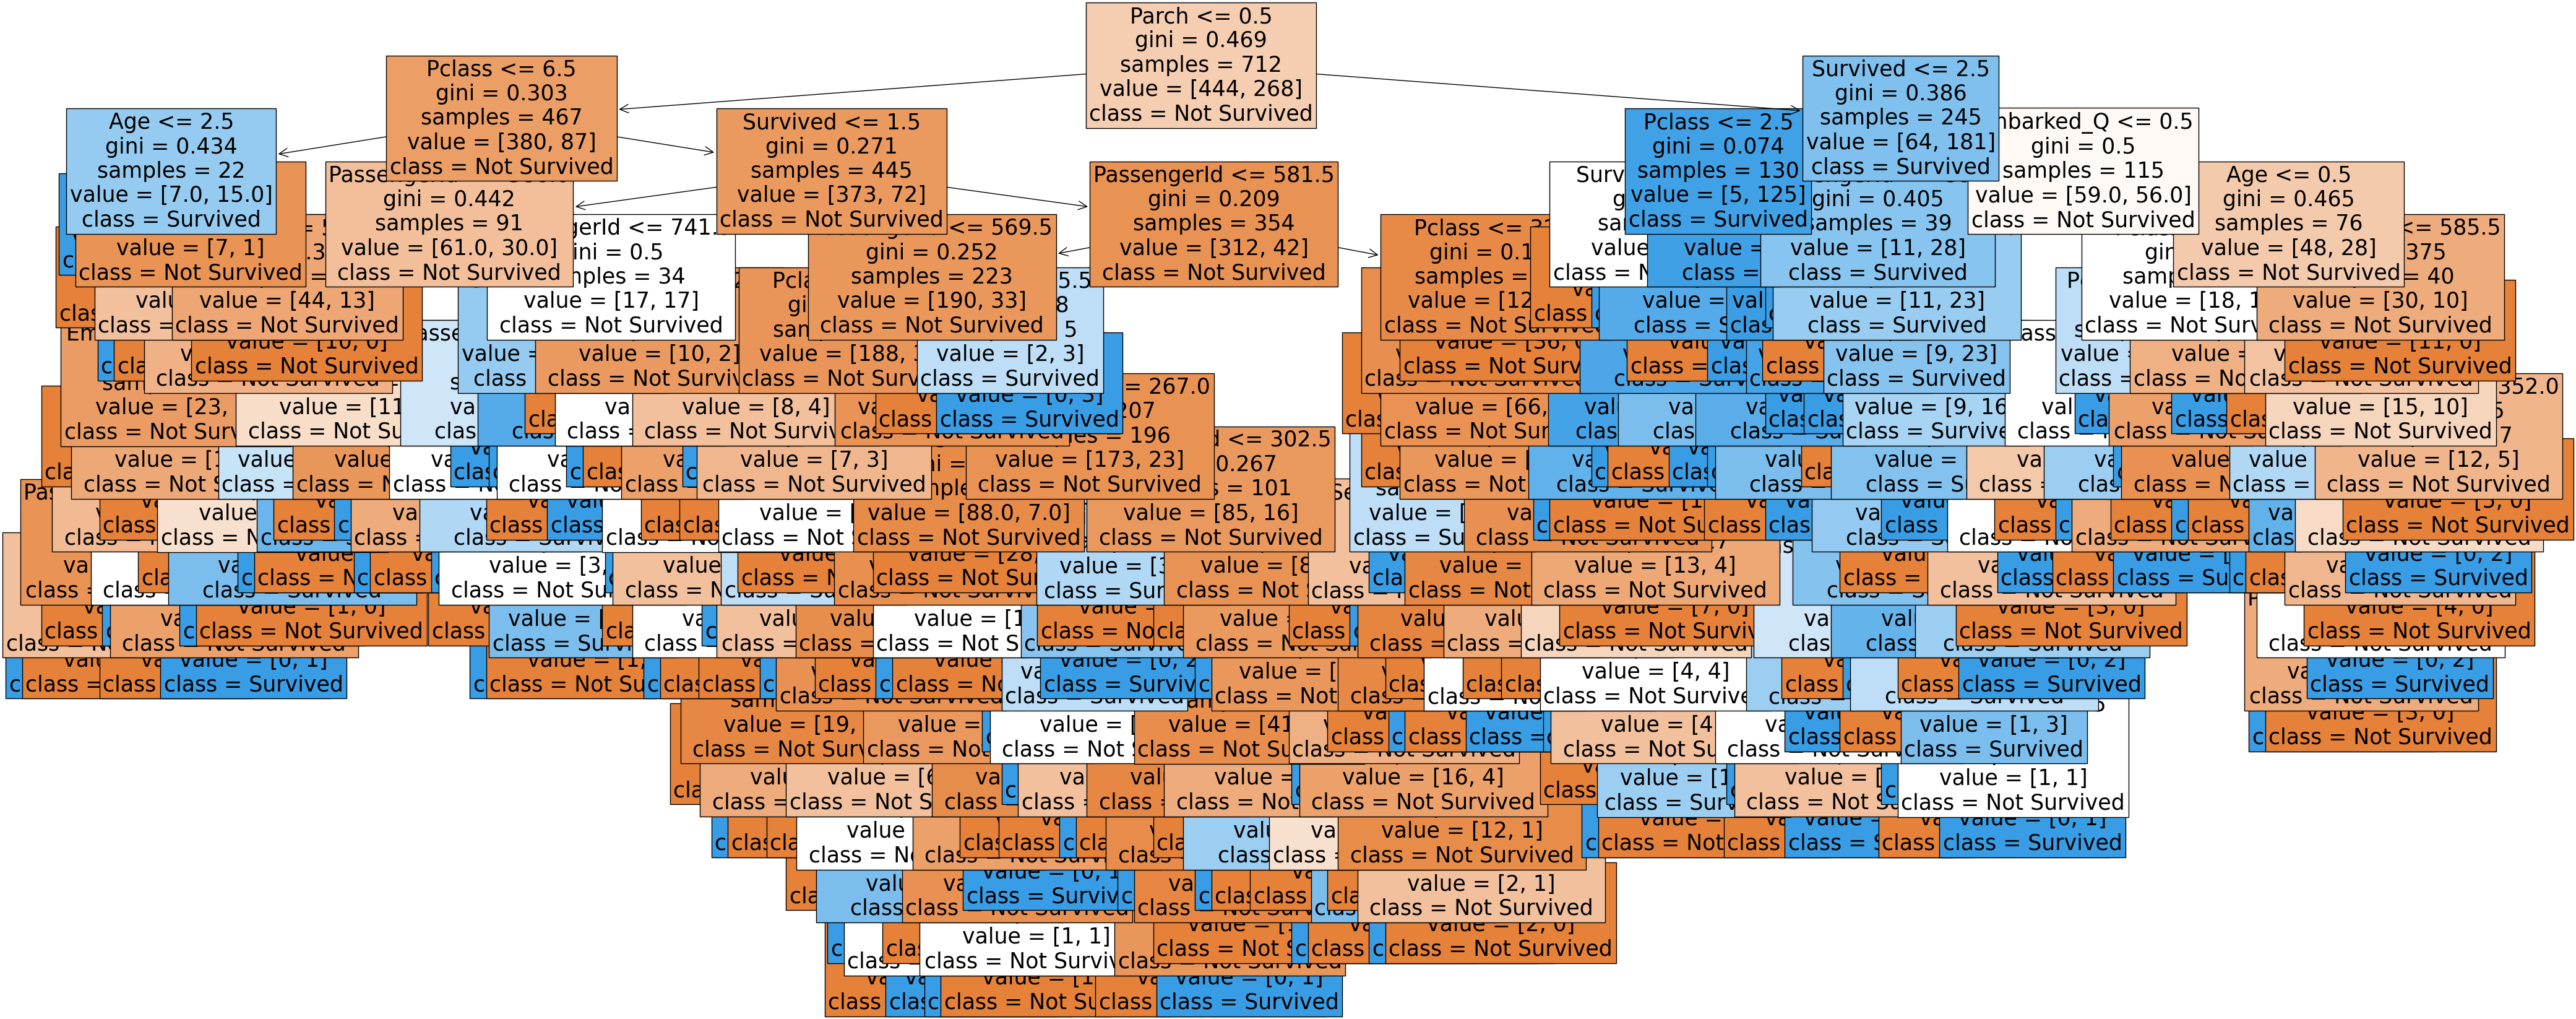

In [19]:
# Plot the decision tree
plt.figure(figsize=(50,20))
features = titanic_df.columns
classes = ['Not Survived','Survived']
tree.plot_tree(unpruned, feature_names=features,class_names=classes,filled=True,fontsize=25)
plt.show()

In [20]:
#Predict the response for test dataset 
y_test_pred_unpruned = unpruned.predict(X_test)

In [21]:
# Print the accuracy of the test set
unpruned_accuracy = accuracy_score(y_test, y_test_pred_unpruned)
print(f'Testing Accuracy for unpruned Decision Tree model: {unpruned_accuracy}')
print("At depth:", unpruned.tree_.max_depth)

Testing Accuracy for unpruned Decision Tree model: 0.770949720670391
At depth: 17


Now, let's plot the accuracy for the max depth and determine the best performance.

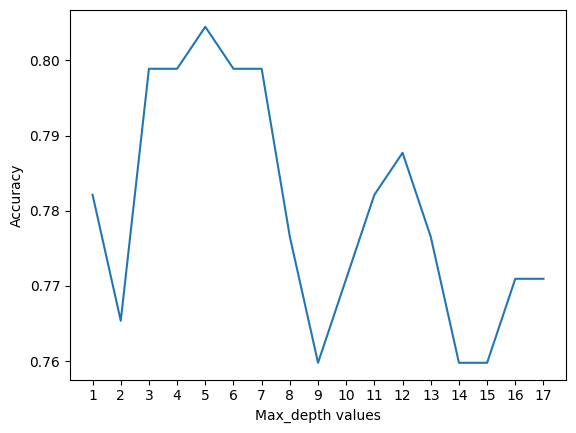

In [22]:
# Look at effect of pruning and plot the accuracy for the max depth
pruned_depths = range(1,unpruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=42)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

As you can see above, we got maximum accuracy at depth 5.

In [23]:
# Display the best depth
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

Best performance reached at depth of: 5


### Import bagged tree model

In [24]:
# Create base model
r=42
ensemble = BaggingClassifier(estimator=unpruned, random_state=r)

In [25]:
# Train the  classifiers
ensemble.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  random_state=42)

In [26]:
# Predict the response for test dataset 
y_test_pred_ensemble = ensemble.predict(X_test)

In [27]:
# Print the accuracy
bagging_accuracy = accuracy_score(y_test, y_test_pred_ensemble)
print(f'Testing Accuracy for ensemble Bagging model: {bagging_accuracy}')

Testing Accuracy for ensemble Bagging model: 0.7821229050279329


### Import AdaBoost tree model

In [28]:
# Create and fit adaboost classifier model 
adab = AdaBoostClassifier() 
adab_model = adab.fit(X_train,y_train)

c:\Users\tsmr_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [29]:
#Predict the response for test dataset for the models
y_test_pred_adab =adab_model.predict(X_test)

In [30]:
# Print accuracy
adab_accuracy = accuracy_score(y_test, y_test_pred_adab)
print(f'Testing Accuracy after Boosting : {adab_accuracy}')

Testing Accuracy after Boosting : 0.776536312849162


### Import Random forest model 

In [31]:
# Create Random Forest Classifier
rf = RandomForestClassifier(random_state=r)

In [32]:
# Train the RF classifier
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Predict the response for test dataset for the models
y_test_pred_rf = rf.predict(X_test)

In [34]:
# Print the accuracy
rf_accuracy = accuracy_score(y_test, y_test_pred_rf)
print(f'Testing Accuracy for Random Forest model: {rf_accuracy}')

Testing Accuracy for Random Forest model: 0.8156424581005587


### Importance scores: Feature Importance

A property of the Random Forest ensemble method in sklearn is that they let you print importance scores for features in the dataset.

In [35]:
# Finding the important features using the built-in Gini importance
feature_names = titanic_df.drop('Survived', axis=1).columns

importances = rf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
feature_imp_df

,Feature,Gini Importance
0,PassengerId,0.277985
2,Age,0.207560
6,Sex_male,0.158659
5,Sex_female,0.124029
1,Pclass,0.107085
3,SibSp,0.051646
4,Parch,0.032818
7,Embarked_C,0.016423
9,Embarked_S,0.015789
8,Embarked_Q,0.008007


Looking that above stats, we can confirm that irrelevant features can be removed. This removal of noise tends to improve performance and reduce training time. Hence, we will try to improve the accuracy by having only the features : PassengerId, Age, Sex and Pclass

In [36]:
# Select important features
X_train_gini = X_train[:,[0,1,2,5,6]]
X_test_gini = X_test[:,[0,1,2,5,6]]

In [37]:
# Create Random Forest Classifier and fit
rf_gini = RandomForestClassifier(random_state=42)
rf_gini.fit(X_train_gini, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Predict the response for test dataset for the models
y_test_pred_rf_gini = rf_gini.predict(X_test_gini)

In [39]:
# Print the accuracy
rf_gini_accuracy = accuracy_score(y_test, y_test_pred_rf_gini)
print(f'Testing Accuracy for Random Forest model with important features : {rf_gini_accuracy}')

Testing Accuracy for Random Forest model with important features : 0.8268156424581006


## Hyperparameter Tuning

### Now we will try to tune the hyperparameters n_estimators and max_depth as given in the requirement

In [40]:
# Hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

params = {
    'max_depth': [2,5,7,8,10,12,15,20],
    'n_estimators': [10,15,20,23,25,30,50,100,200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 7, 8, 10, 12, 15, 20],
                         'n_estimators': [10, 15, 20, 23, 25, 30, 50, 100,
                                          200]},
             scoring='accuracy', verbose=1)

In [41]:
# Check best score hyperparameters
print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
rf_best

0.8258426966292135


RandomForestClassifier(max_depth=5, n_estimators=23, random_state=42)

##### Calculate accuracy with the best estimator as shown above

In [42]:
rf_hp = RandomForestClassifier(max_depth=5, n_estimators=23, random_state=42)

In [43]:
# Train the  classifiers
rf_hp.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=23, random_state=42)

In [44]:
# Predict the response for test dataset for the models
y_test_pred_rf_hp = rf_hp.predict(X_test)

In [45]:
# Check the accuracy
rf_hp_accuracy = accuracy_score(y_test, y_test_pred_rf_hp)
print(f'Testing Accuracy for Random Forest model with hyperparameters: {rf_hp_accuracy}')

Testing Accuracy for Random Forest model with hyperparameters: 0.8100558659217877


## Comparing accuracy of all the models

In [46]:
# Print accuracy score of all the models
print("Testing Accuracy of all the models :")
print("================================================================================")
print(f'unpruned Decision Tree model: {unpruned_accuracy}')
print(f'ensemble Bagging model: {bagging_accuracy}')
print(f'AdaBoost model : {adab_accuracy}')
print(f'Random Forest model: {rf_accuracy}')
print(f'Random Forest model with only important features : {rf_gini_accuracy}')
print(f'Random Forest model with hyperparameters - n_esimators={grid_search.best_estimator_.n_estimators} & max_depth={grid_search.best_estimator_.max_depth} :{rf_hp_accuracy}')

Testing Accuracy of all the models :
unpruned Decision Tree model: 0.770949720670391
ensemble Bagging model: 0.7821229050279329
AdaBoost model : 0.776536312849162
Random Forest model: 0.8156424581005587
Random Forest model with only important features : 0.8268156424581006
Random Forest model with hyperparameters - n_esimators=23 & max_depth=5 :0.8100558659217877


From the above accuracy scores, it indicates the random forest model that was fitted with only important featues reported high accuracy. 